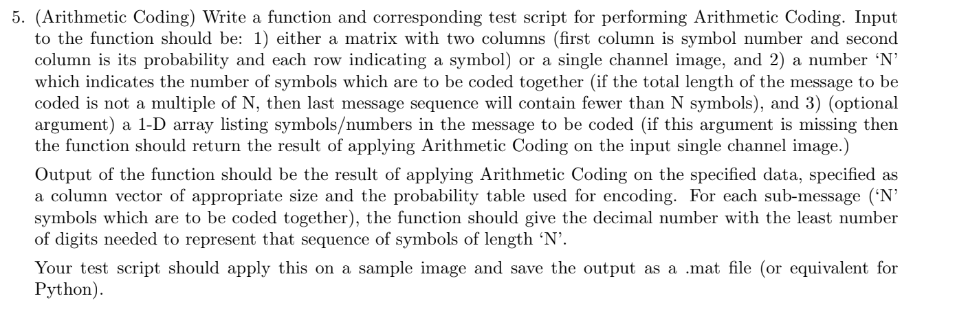

Question-5
//////////////
//////////////////

In [ ]:
from decimal import Decimal     #
from decimal import getcontext  #for fixing the number of digits after
from PIL import Image   # for reading an image we need this module

getcontext().prec = 16  # use to fix number digit after decimal 


# ////////////////// make_prob_table ///////////////////////////////
'''
when  our input to encode function is an image or marix then we need to make 
probability table  using that  matrix .
it will first calculate the frequency table and using frequency table it will calculate probability table.
'''
def make_prob_table(img):
    freq_table={}
    for row in img:
        for item in row:
            if item in freq_table:
                freq_table[item] += 1
            else:
                freq_table[item] = 1

    print("freq_table: ",freq_table)
    total_count = sum(freq_table.values())

    prob_table = {}

    for item, count in freq_table.items():
        prob_table[item] = count / total_count

    return prob_table
# /////////////////////  cumulitive_prob /////////////////////////////
'''
this function will take probability table and range lb and ub
This function will make the probabiity range(like [lb,ub) ) corrosponding to each  message symbole 

'''
def cumulitive_prob(prob_table, lb, ub):
    store_probs_range = {}  #to store message symbol and their probability range in which that symbole lies
    gap = ub - lb        #initial gap
    for idx in range(len(prob_table.items())):
        symbole = list(prob_table.keys())[idx]  #take keys at index idx
        prob= Decimal(prob_table[symbole])
        cur_ub = prob* gap + lb
        store_probs_range[symbole] = [lb, cur_ub]
        lb = cur_ub
    return store_probs_range
     
# ///////////////////// ENCODE /////////////////////
'''
this function  will take probability table  and message list 
it will call cumulitive_prob function n time where n is length of message 

'''
def encode(prob_table,msg_list):
    encoder = []    #it will store dictionary  which contain symbol and probability range corrosponding to that symbol
    lb = Decimal(0.0)   # for first time making probability range  we hav to take lower =0 and upper =1
    ub = Decimal(1.0)

    for msg_term_idx in range(len(msg_list)):
        stage_probs = cumulitive_prob(prob_table, lb, ub)
        msg_symbl = msg_list[msg_term_idx]
        lb = stage_probs[msg_symbl][0]
        ub = stage_probs[msg_symbl][1]

        encoder.append(stage_probs)

    m=len(encoder)
    last_symbole=msg_list[len(msg_list)-1]
    last_partion = encoder[m-1][last_symbole]
    l=last_partion[0]
    u=last_partion[1]
     
    # print("encoder partion: ")
    # for x in encoder:
    #     print(x)
    #     print()
    # print()
    return f"{msg_list} => {last_partion} =>{Decimal((l+u)/2)}"
'''/
/////////////////////// DECODE ////////////////////////////
IT WILL TAKE ENCODED VALUE ,MESSAGE LENGTH AND PROBABILITY TABLE
It will call cumulitive_prob function msglen time and each time it will check 
that the given encoded val lies in which probability range and store that key 
into decode_msg list 

my function will return encoded value and original message corrosponding to that 
value
'''
def decode(encoded_value, msg_length, prob_table):
    decoded_msg = []  #to store original message

    lb = Decimal(0.0)
    ub = Decimal(1.0)

    for idx in range(msg_length):
        stage_probs = cumulitive_prob(prob_table, lb, ub)
        cur_sumb=-1
        for symbole, cum_prob in stage_probs.items():
            if encoded_value >= cum_prob[0] and encoded_value <cum_prob[1]:
                cur_sumb=symbole
                break

        decoded_msg.append(cur_sumb)
        lb = stage_probs[symbole][0]
        ub = stage_probs[symbole][1]

    return  f"{encoded_value} =>{decoded_msg}"

# //SECTION_1 :  if input is an image  or matrix /////////////////////////////////
img = Image.open("img.png")
mat = array(img)     #convert image into araay 

# **** if you have taken an image please comment matrix below 
# mat= [[6 ,8, 9, 3, 4, 3, 8],               
#       [9 ,8, 6, 2, 3, 8, 4],
#       [7 ,2, 0, 7, 0, 6, 5],
#       [5 ,0, 8, 0, 8, 3, 0],
#       [4 ,4, 7, 4, 0, 2, 2],
#       [8 ,4, 1, 7, 4, 7, 8],
#       [1 ,4, 3, 6, 8, 6, 9],
#       [6 ,3, 0, 7, 5, 0, 8],
#       [5 ,1, 2, 0, 7, 3, 8]]

r=len(mat)
c=len(mat[0])
# give message length 
n=3
prob_table=make_prob_table(mat)  #it will make probability table using  input  image 
print("probt_table: ",prob_table)

msg_list=[] 
i=0
cnt=0
output=[]
while( i<r*c):
    row=i//c
    col=i%c
    ele=mat[row][col]
    msg_list.append(ele)
    cnt+=1
    if(cnt==n or i==r*c-1):
        output.append(encode(prob_table,msg_list))
        msg_list.clear()
        cnt=0
    i+=1;
for out in output:
  print(out)
  print()
#  END OF SECTION -1
# /////////////////////////////////////////////
# print("decoded massage ")
# print(decode(0.23424,3,prob_table))


# SECTION-2:  if input is probability table and message_list  please  comment the above section /////////////////

# prob_table={'a':0.2,'b':0.3,'c':0.1,'d':0.4}
# msg_list=['a','b','c','a','d']

# print(encode(prob_table,msg_list))


Streaming output truncated to the last 5000 lines.
[0, 0, 0] => [Decimal('0.5881478342356166'), Decimal('0.6410716583225597')] =>0.614609746279088

[0, 0, 0] => [Decimal('0.5881478342356166'), Decimal('0.6410716583225597')] =>0.614609746279088

[0, 0, 0] => [Decimal('0.5881478342356166'), Decimal('0.6410716583225597')] =>0.614609746279088

[0, 0, 0] => [Decimal('0.5881478342356166'), Decimal('0.6410716583225597')] =>0.614609746279088

[0, 0, 1] => [Decimal('0.5334751196117265'), Decimal('0.5881478342356166')] =>0.5608114769236715

[1, 1, 1] => [Decimal('0'), Decimal('0.05834578400776748')] =>0.02917289200388374

[1, 1, 1] => [Decimal('0'), Decimal('0.05834578400776748')] =>0.02917289200388374

[1, 1, 1] => [Decimal('0'), Decimal('0.05834578400776748')] =>0.02917289200388374

[1, 1, 1] => [Decimal('0'), Decimal('0.05834578400776748')] =>0.02917289200388374

[1, 1, 0] => [Decimal('0.05834578400776748'), Decimal('0.1148251820088422')] =>0.08658548300830485

[0, 0, 0] => [Decimal('0.588147

Question-2//////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////

Question-1